# Libraries 

In [85]:
# imports

# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from imblearn.over_sampling import SMOTE
import itertools
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import time
import nbformat
import plotly.io as pio

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve #plot_confusion_matrix, plot_roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
#import eli5
#from eli5.sklearn import PermutationImportance
from sklearn.utils import resample

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

Based on: https://www.kaggle.com/code/samuelcortinhas/spaceship-titanic-a-complete-guide/notebook#EDA

# Data 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
print(train.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [6]:
print(test.isnull().sum())

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

# EDA 

## Taget Distribution

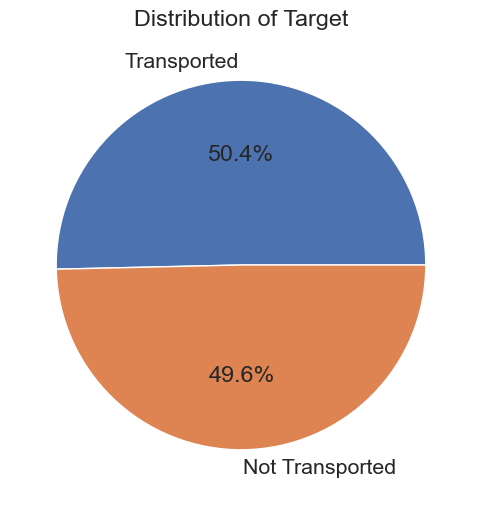

In [9]:
# Plot Target Distribution 
plt.figure(figsize=(6,6))
plt.pie(train['Transported'].value_counts(), autopct='%1.1f%%', labels=['Transported', 'Not Transported'])
plt.title('Distribution of Target')
plt.show()

## Age Feature 

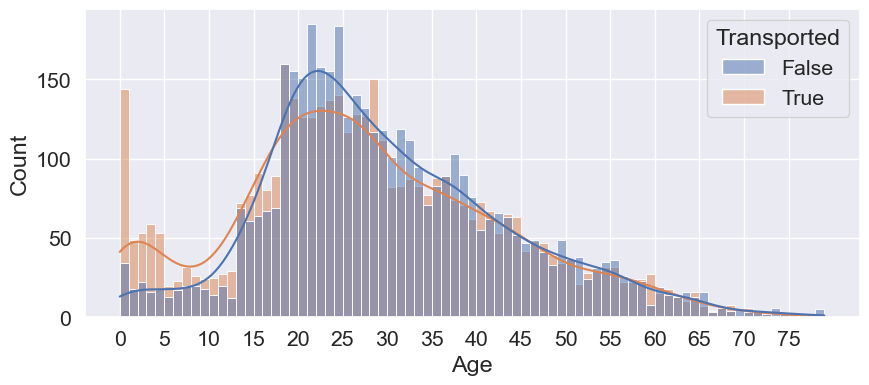

In [10]:
# Plot passengers age and their transported status 
plt.figure(figsize=(10,4))
sns.histplot(data=train, x='Age', hue='Transported', kde=True, binwidth=1)
plt.xticks(ticks=range(0, int(train['Age'].max()) + 1, 5)) # add more tick marks on x axis for more clarity  
plt.show()

- 0-18 yo are more likely to be transported 
- 18-34 yo are less likely to be transported
- 34+ yo are about equally likely to be transported   

## Other Features

### Expenditure Features

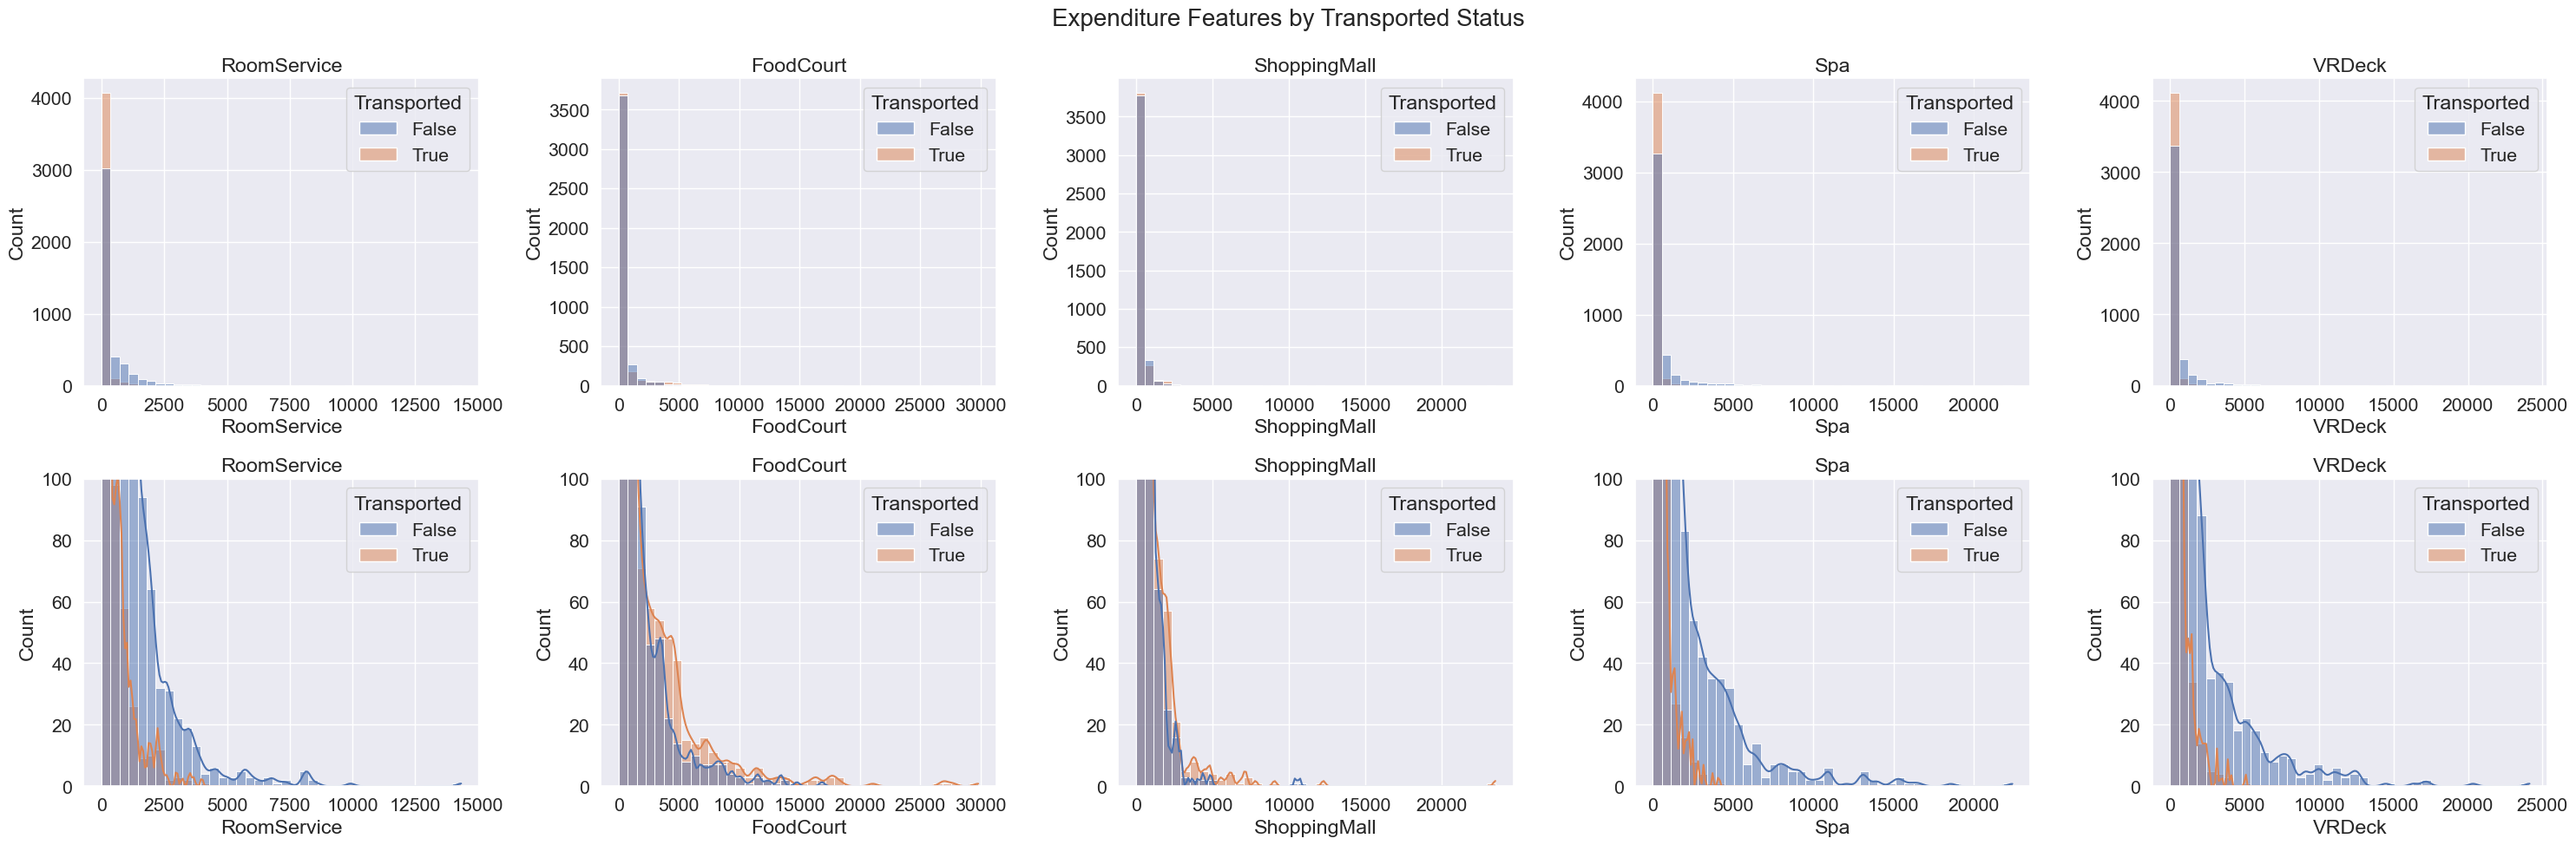

In [11]:
# Expenditure Features
features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot the Features 
fig = plt.figure(figsize=(30, 10))
fig.suptitle("Expenditure Features by Transported Status", fontsize=20)
for i, featurename in enumerate(features):
    # Top row plots: Histogram without KDE
    ax = fig.add_subplot(2, 5, i + 1)
    sns.histplot(data=train, x=featurename, hue='Transported', ax=ax, bins=40)
    ax.set_title(featurename)

    # Bottom row plots: Histogram with KDE
    ax = fig.add_subplot(2, 5, i + 6)
    sns.histplot(data=train, x=featurename, hue='Transported', ax=ax, bins=40, kde=True)
    plt.ylim([0,100])
    ax.set_title(featurename)
fig.tight_layout()  
plt.show()


- Most people do not spend money
- Heavily skewed to the right, meaning most people spend very little 
- Those who spent money on Room service, Spa and VR Deck were less likely to be transported   

### Categorical Features

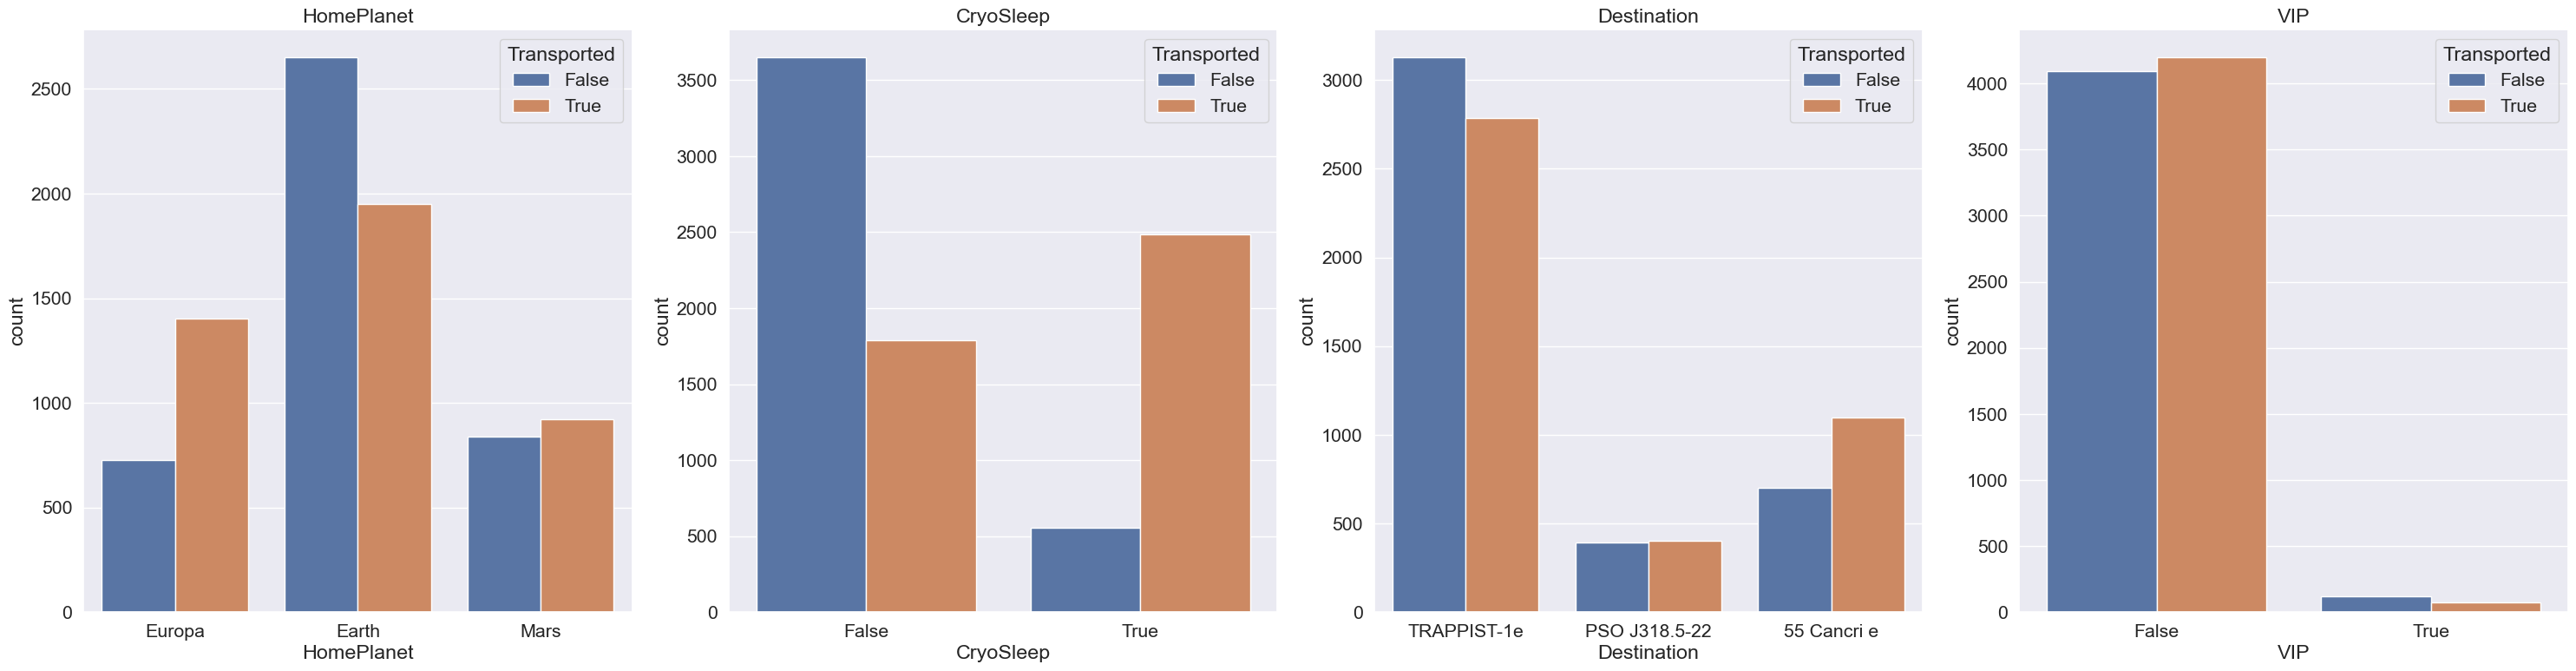

In [12]:
# Categorical features 
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot the features 
fig = plt.figure(figsize=(30,15))
for i, featurename in enumerate(cat_features):
    ax = fig.add_subplot(2, 4, i + 1)
    sns.countplot(data=train, x=featurename, ax=ax, hue='Transported')
    ax.set_title(featurename)
fig.tight_layout()
plt.show()

- Home Planet and Cryo Sleep seems to be statistically important features
- Destination feature has some relevancy it seems
- VIP feature seems unimportant

### Qualitative Features

In [13]:
# Qualitative features
qual_feats=['PassengerId', 'Cabin' ,'Name']

# Preview qualitative features
train[qual_feats].head(20)

,PassengerId,Cabin,Name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines
5,0005_01,F/0/P,Sandie Hinetthews
6,0006_01,F/2/S,Billex Jacostaffey
7,0006_02,G/0/S,Candra Jacostaffey
8,0007_01,F/3/S,Andona Beston
9,0008_01,B/1/P,Erraiam Flatic


- PassengerId takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group.
- Cabin takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Notes:
- We can extract the group and group size from the PassengerId feature.
- We can extract the deck, number and side from the cabin feature.
- We could extract the surname from the name feature to identify families.

# Feature Engineering

## Age Groups

In [14]:
# New feature for the train set
train['AgeGroup'] = np.nan
train.loc[train['Age']<=12, 'AgeGroup'] = '0-12' 
train.loc[(train['Age']>12) & (train['Age']<=18), 'AgeGroup'] = '13-18'
train.loc[(train['Age']>18) & (train['Age']<=25), 'AgeGroup'] = '19-25'
train.loc[(train['Age']>25) & (train['Age']<=30), 'AgeGroup'] = '26-30'
train.loc[(train['Age']>30) & (train['Age']<=50), 'AgeGroup'] = '31-50'
train.loc[train['Age']>50, 'AgeGroup'] = '51+'

# New feature for the test set
test['AgeGroup'] = np.nan
test.loc[test['Age']<=12, 'AgeGroup'] = '0-12' 
test.loc[(test['Age']>12) & (test['Age']<=18), 'AgeGroup'] = '13-18'
test.loc[(test['Age']>18) & (test['Age']<=25), 'AgeGroup'] = '19-25'
test.loc[(test['Age']>25) & (test['Age']<=30), 'AgeGroup'] = '26-30'
test.loc[(test['Age']>30) & (test['Age']<=50), 'AgeGroup'] = '31-50'
test.loc[test['Age']>50, 'AgeGroup'] = '51+'

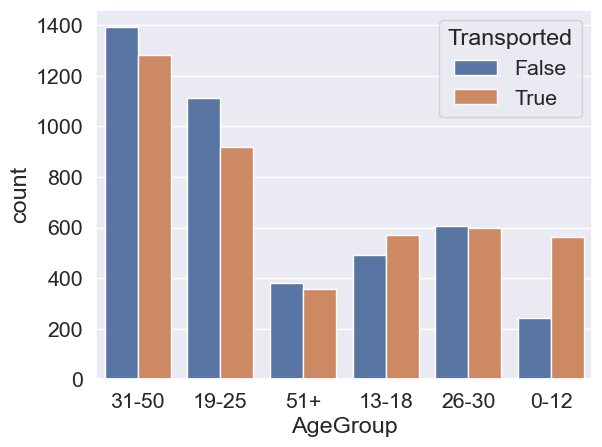

In [15]:
# Plot new feature
sns.countplot(data=train, x='AgeGroup', hue='Transported')
plt.show()

## Expenditures

In [16]:
# Expenditure features
features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# New feature for train set
train['TotalExp'] = train[features].sum(axis=1) # Total of all expeditures 
train['NoExp'] = (train['TotalExp']==0).astype(int) # No spending, boolean converted to int (0 = False, 1 = True)
train['EssentialExp'] = train[['FoodCourt', 'ShoppingMall']].sum(axis=1) # Sum of Essential expenditures
train['LuxuryExp'] = train[['RoomService', 'Spa', 'VRDeck']].sum(axis=1) # Sum of Luxury expenditures 

# New feature for test set
test['TotalExp'] = test[features].sum(axis=1) 
test['NoExp'] = (test['TotalExp']==0).astype(int) 
test['EssentialExp'] = test[['FoodCourt', 'ShoppingMall']].sum(axis=1) 
test['LuxuryExp'] = test[['RoomService', 'Spa', 'VRDeck']].sum(axis=1) 

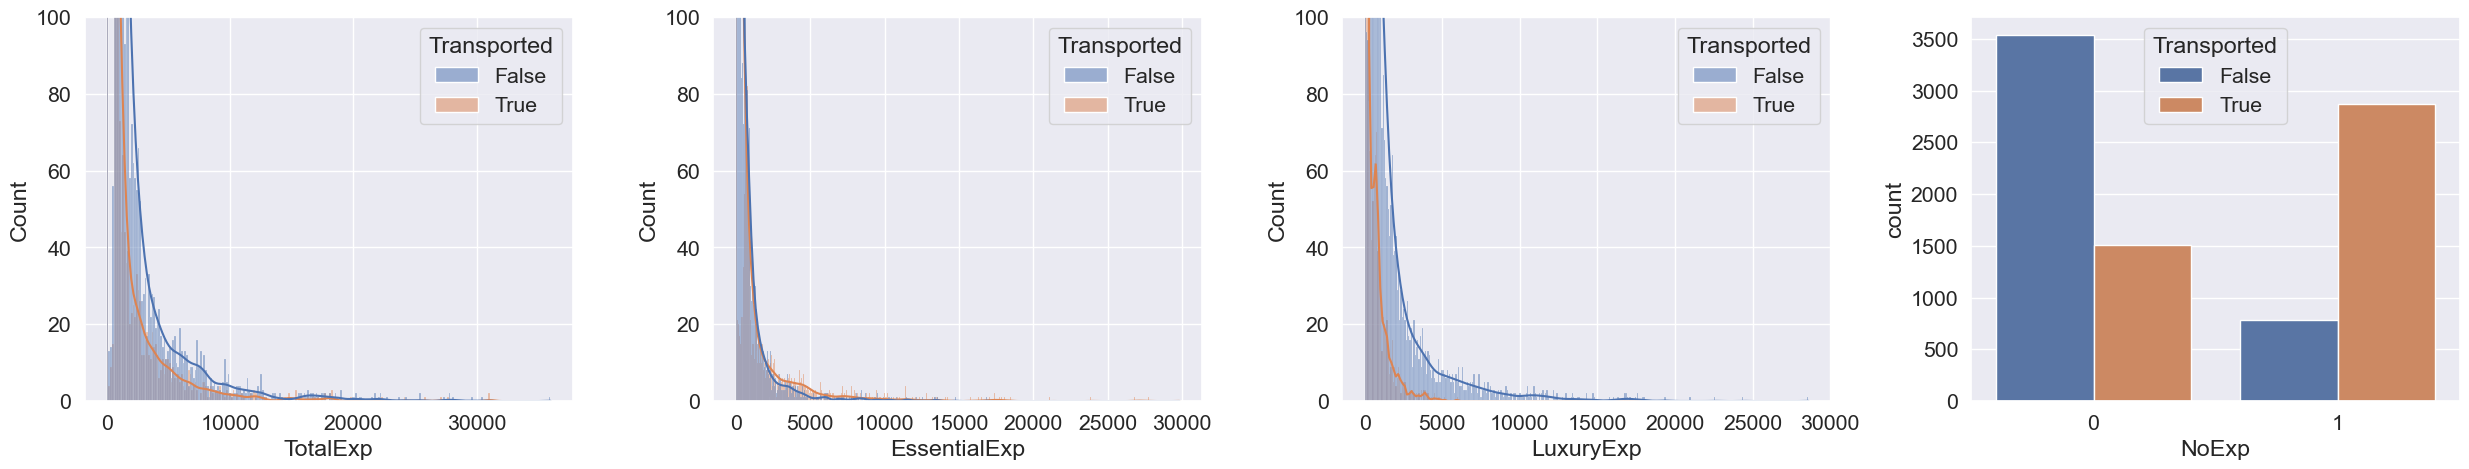

In [17]:
# Plot new features 

newfeatures = ['TotalExp', 'EssentialExp', 'LuxuryExp']
plt.figure(figsize=(25, 5))

# First 3 subplots
for i, feat in enumerate(newfeatures):
    plt.subplot(1, 4, i + 1)
    sns.histplot(data=train, x=feat, hue='Transported', kde=True)
    plt.ylim((0,100))

# Last subplot
plt.subplot(1, 4, 4)
sns.countplot(data=train, x='NoExp', hue='Transported')

plt.tight_layout()
plt.show()

## Passenger Group

In [18]:
# New feature passenger group
train['Group'] = train['PassengerId'].str.split('_').str[0].astype(int) # train set
test['Group'] = test['PassengerId'].str.split('_').str[0].astype(int) # test set

# New feature passenger's group size
train['GroupSize'] = train['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x]) # train set
test['GroupSize'] = test['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x]) # test set 

Alternative way that takes up less memory and is faster:

In [19]:
# Calculate group sizes separately
train_counts = train.groupby('Group').size().reset_index(name='Count')
test_counts = test.groupby('Group').size().reset_index(name='Count')

# Merge the counts using a full outer join
combined_counts = pd.merge(train_counts, test_counts, on='Group', how='outer', suffixes=('_train', '_test')).fillna(0)

# Sum the counts from train and test
combined_counts['Group_size'] = combined_counts['Count_train'] + combined_counts['Count_test']

# Create a mapping dictionary
group_size_dict = dict(zip(combined_counts['Group'], combined_counts['Group_size']))

# Map the combined counts back to the train/test sets
train['Group_size'] = train['Group'].map(group_size_dict)
test['Group_size'] = test['Group'].map(group_size_dict)

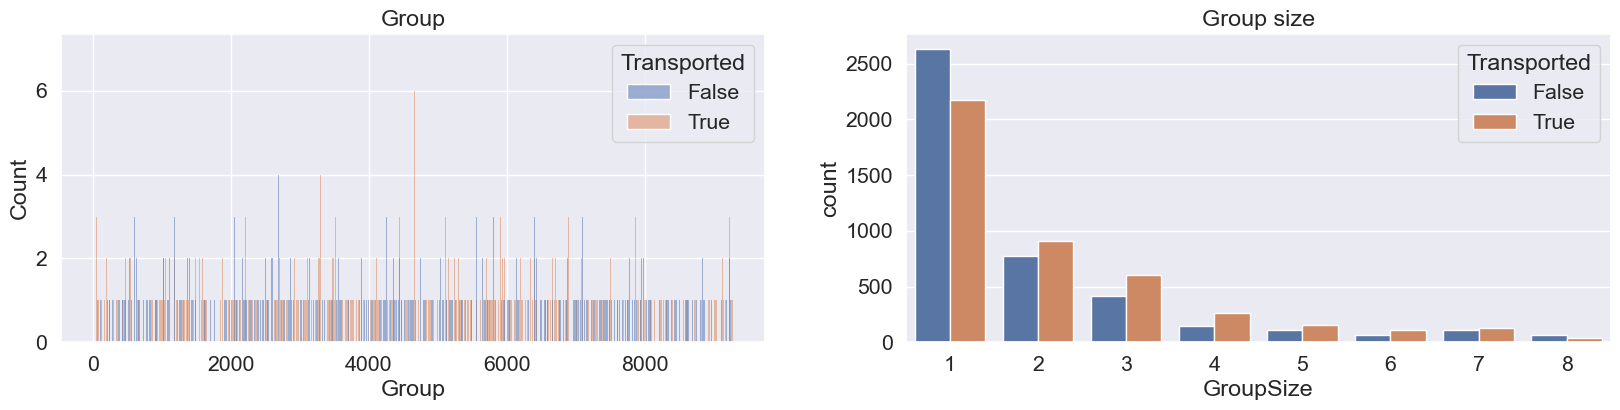

In [20]:
# Ploting the new features
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=train, x='Group', hue='Transported', binwidth=1)
plt.title('Group')

plt.subplot(1,2,2)
sns.countplot(data=train, x='GroupSize', hue='Transported')
plt.title('Group size')
fig.tight_layout()


Adding another feature that tracks whether the passenger is traveling solo:

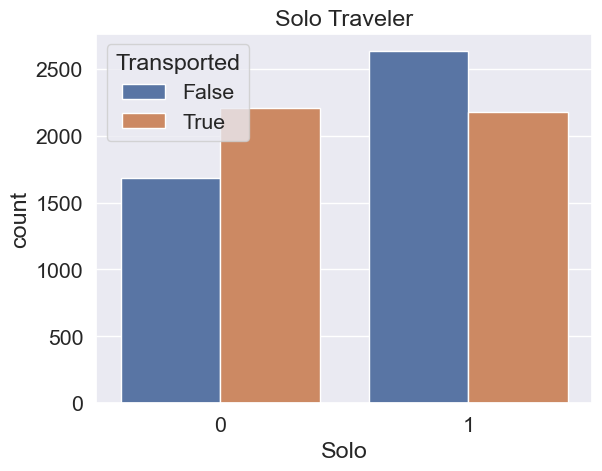

In [21]:
# New feature for both train and test set
train['Solo'] = (train['GroupSize']==1).astype(int)
test['Solo'] = (test['GroupSize']==1).astype(int)

# Ploting new features
sns.countplot(data=train, x='Solo', hue='Transported')
plt.title('Solo Traveler')
plt.show()

## Cabin Location

In [22]:
# New features: Separate cabin into 3 sections - train set
train[['CabinDeck', 'CabinNum', 'CabinSide']] = train['Cabin'].str.split('/', expand=True)
train['CabinNum'] = train['CabinNum'].astype('Int64') # Convert 'CabinNum' to integer (nullable integer type Int64)

# New features: Separate cabin into 3 sections - test set
test[['CabinDeck', 'CabinNum', 'CabinSide']] = test['Cabin'].str.split('/', expand=True)
test['CabinNum'] = test['CabinNum'].astype('Int64') # Convert 'CabinNum' to integer (nullable integer type Int64)

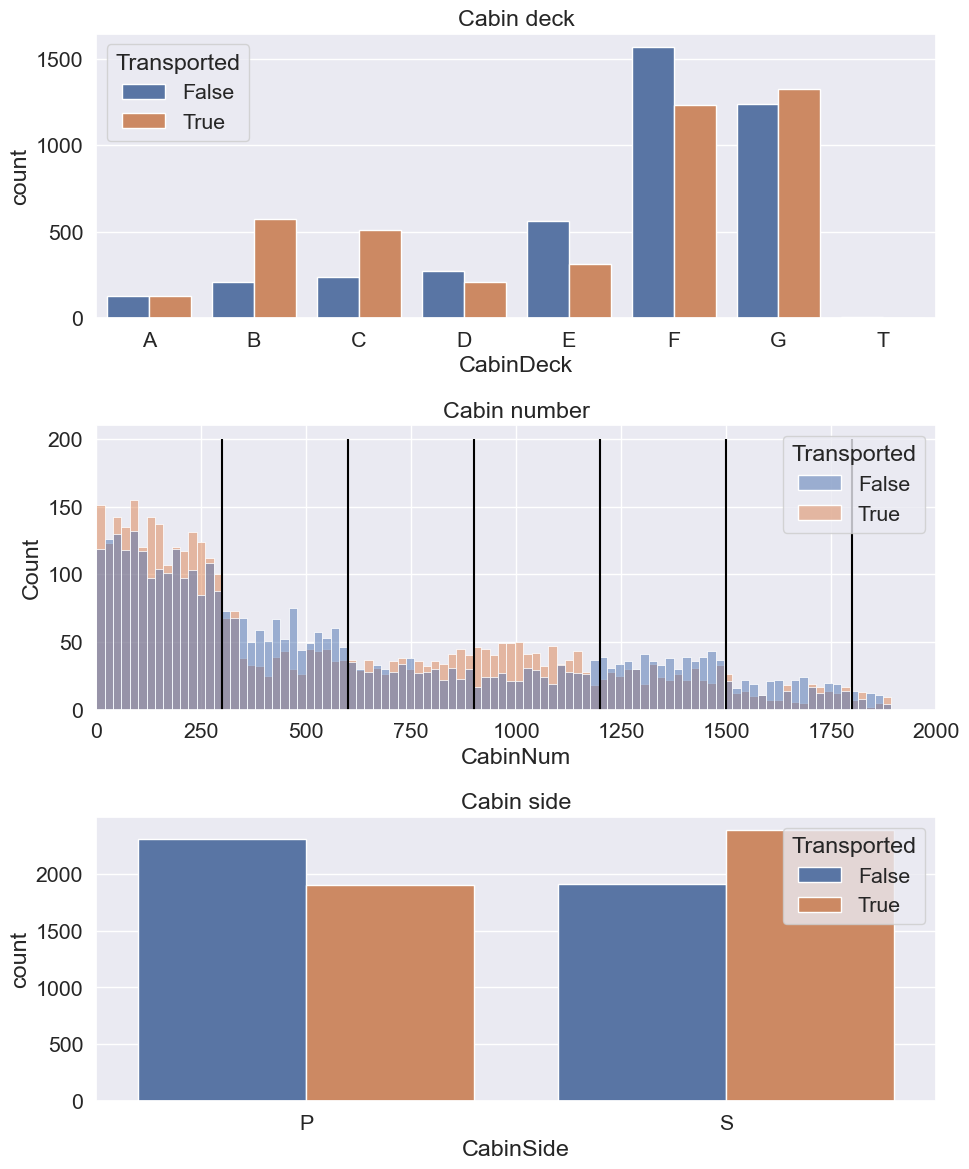

In [23]:
# Plot distribution of new features
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=train, x='CabinDeck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(3,1,2)
sns.histplot(data=train, x='CabinNum', hue='Transported',binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

plt.subplot(3,1,3)
sns.countplot(data=train, x='CabinSide', hue='Transported')
plt.title('Cabin side')
plt.tight_layout()
plt.show()

In [24]:
# New feature: Cabin region - train set
train['Cabin_region1'] = (train['CabinNum'] < 300).astype('Int64')
train['Cabin_region2'] = ((train['CabinNum'] >= 300) & (train['CabinNum'] < 600)).astype('Int64') 
train['Cabin_region3'] = ((train['CabinNum'] >= 600) & (train['CabinNum'] < 900)).astype('Int64')
train['Cabin_region4'] = ((train['CabinNum'] >= 900) & (train['CabinNum'] < 1200)).astype('Int64')
train['Cabin_region5'] = ((train['CabinNum'] >= 1200) & (train['CabinNum'] < 1500)).astype('Int64')
train['Cabin_region6'] = ((train['CabinNum'] >= 1500) & (train['CabinNum'] < 1800)).astype('Int64')
train['Cabin_region7'] = (train['CabinNum'] >= 1800).astype('Int64')

# New feature: Cabin region - test set
test['Cabin_region1'] = (test['CabinNum'] < 300).astype('Int64')
test['Cabin_region2'] = ((test['CabinNum'] >= 300) & (test['CabinNum'] < 600)).astype('Int64') 
test['Cabin_region3'] = ((test['CabinNum'] >= 600) & (test['CabinNum'] < 900)).astype('Int64')
test['Cabin_region4'] = ((test['CabinNum'] >= 900) & (test['CabinNum'] < 1200)).astype('Int64')
test['Cabin_region5'] = ((test['CabinNum'] >= 1200) & (test['CabinNum'] < 1500)).astype('Int64')
test['Cabin_region6'] = ((test['CabinNum'] >= 1500) & (test['CabinNum'] < 1800)).astype('Int64')
test['Cabin_region7'] = (test['CabinNum'] >= 1800).astype('Int64')

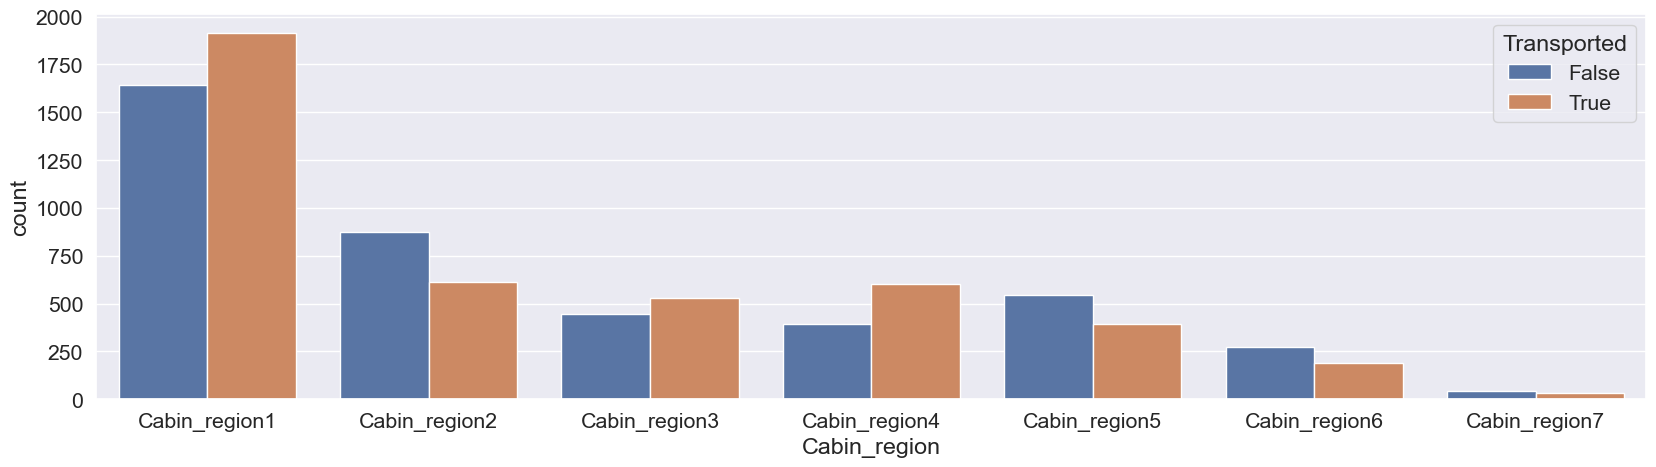

In [25]:
# Ploting new feature

# Melt dataframe to be able to plot one hot encoded feature
train_melted = pd.melt(train, id_vars=['Transported'], value_vars=['Cabin_region1', 'Cabin_region2', 'Cabin_region3', 'Cabin_region4', 'Cabin_region5', 'Cabin_region6', 'Cabin_region7'], var_name='Cabin_region', value_name='Presence')

# Keep only rows where Cabin_regionx is 1
train_melted = train_melted[train_melted['Presence'] == 1]

# Ploting 
plt.figure(figsize=(20,5))
sns.countplot(data=train_melted, x='Cabin_region', hue='Transported')
plt.show()

## Family Group

Text(0.5, 1.0, 'Family size')

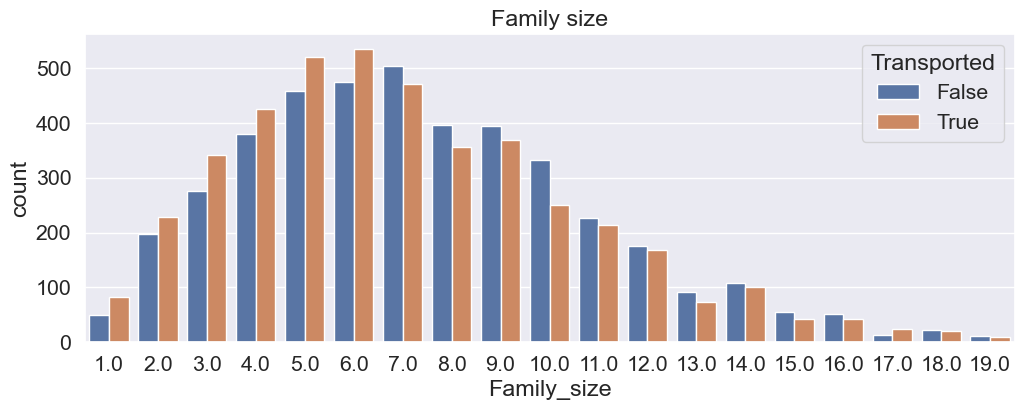

In [26]:
# Replace NaN's with outliers for now (so we can split feature)
train['Name'].fillna('Unknown Unknown', inplace=True)
test['Name'].fillna('Unknown Unknown', inplace=True)

# New feature - Surname
train['Surname']=train['Name'].str.split().str[-1]
test['Surname']=test['Name'].str.split().str[-1]

# New feature - Family size
train['Family_size']=train['Surname'].map(lambda x: pd.concat([train['Surname'],test['Surname']]).value_counts()[x])
test['Family_size']=test['Surname'].map(lambda x: pd.concat([train['Surname'],test['Surname']]).value_counts()[x])

# Put Nan's back in (we will fill these later)
train.loc[train['Surname']=='Unknown','Surname']=np.nan
train.loc[train['Family_size']>100,'Family_size']=np.nan
test.loc[test['Surname']=='Unknown','Surname']=np.nan
test.loc[test['Family_size']>100,'Family_size']=np.nan

# Drop name (we don't need it anymore)
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

# New feature distribution
plt.figure(figsize=(12,4))
sns.countplot(data=train, x='Family_size', hue='Transported')
plt.title('Family size')

# Missing Values

In [27]:
# Labels and features
y=train['Transported'].copy().astype(int)
X=train.drop('Transported', axis=1).copy()

# Concatenate dataframes
data=pd.concat([X, test], axis=0).reset_index(drop=True)

In [28]:
# Columns with missing values
na_cols=data.columns[data.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(data[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(data),2)
mv

,Number_missing,Percentage_missing
HomePlanet,288,2.22
CryoSleep,310,2.39
Cabin,299,2.31
Destination,274,2.11
Age,270,2.08
VIP,296,2.28
RoomService,263,2.03
FoodCourt,289,2.23
ShoppingMall,306,2.36
Spa,284,2.19


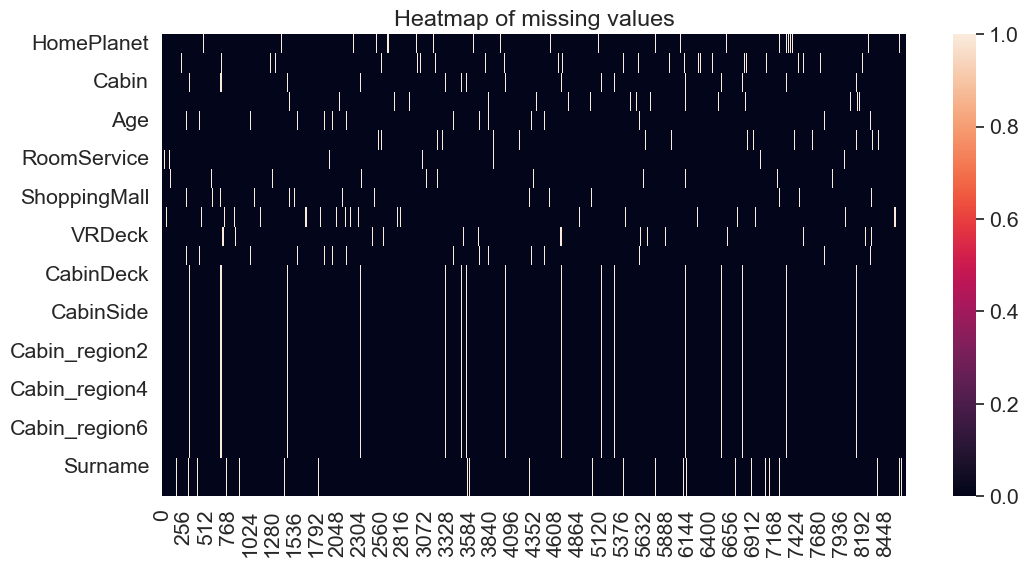

In [29]:
# Heatmap of missing values
plt.figure(figsize=(12,6))
sns.heatmap(train[na_cols].isna().T)
plt.title('Heatmap of missing values')
plt.show()

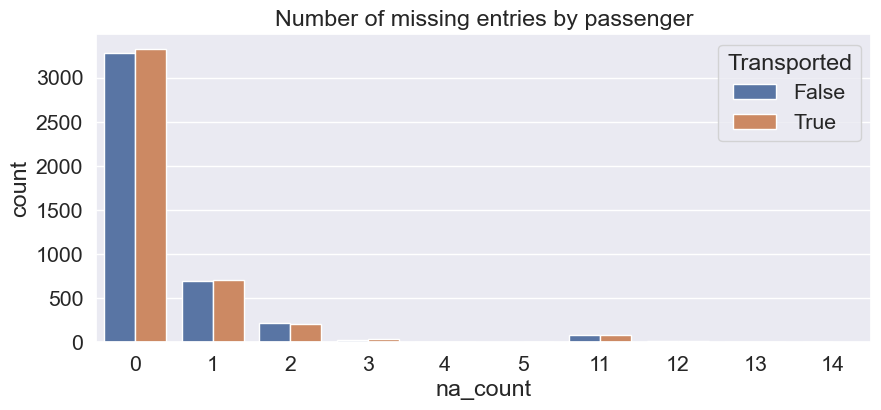

In [30]:
# Countplot of number of missing values by passenger
train['na_count']=train.isna().sum(axis=1)
plt.figure(figsize=(10,4))
sns.countplot(data=train, x='na_count', hue='Transported')
plt.title('Number of missing entries by passenger')
train.drop('na_count', axis=1, inplace=True)

## HomePlanet

### Home planet & passenger's group

In [31]:
# Joint distribution of Group and HomePlanet
GHP_gb=data.groupby(['Group','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
GHP_gb.head()

HomePlanet,Earth,Europa,Mars
Group,,,
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,2.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0


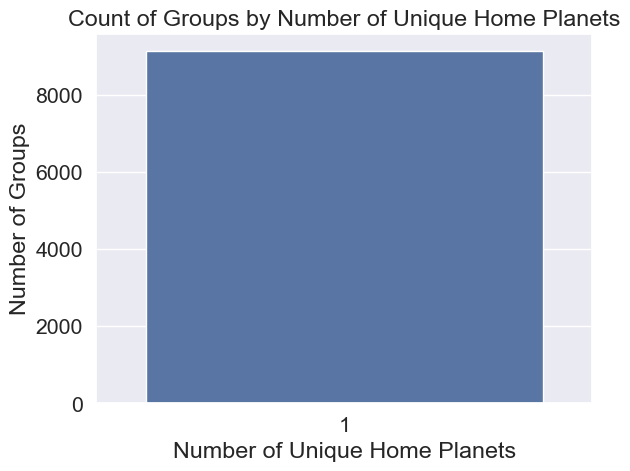

In [32]:
# number of unique home planets per group
unique_planet_counts = (GHP_gb > 0).sum(axis=1).value_counts().sort_index()

# plot
sns.barplot(x=unique_planet_counts.index, y=unique_planet_counts.values)
plt.title('Count of Groups by Number of Unique Home Planets')
plt.xlabel('Number of Unique Home Planets')
plt.ylabel('Number of Groups')
plt.show()

In [33]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Fill nan with group's home planet

# Map the home planet of each group
group_planet_mapping = data.groupby('Group')['HomePlanet'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Fill passenger's home planet that are nan with the mapping 
data['HomePlanet'] = data['HomePlanet'].fillna(data['Group'].map(group_planet_mapping))

# Print number of missing values
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 288
#HomePlanet missing values after: 157


### Home planet & cabin deck

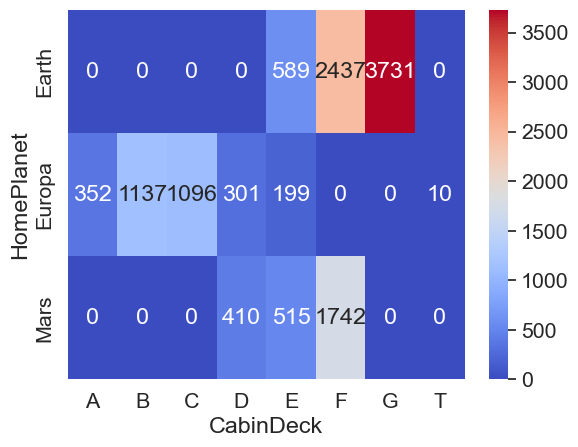

In [34]:
# Joint distribution of CabinDeck and HomePlanet
CDHP_gb = data.groupby(['CabinDeck','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Heatmap of missing values
sns.heatmap(CDHP_gb.T, annot=True, fmt='g', cmap='coolwarm')
plt.show()

In [35]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Decks A, B, C or T came from Europa
data.loc[(data['HomePlanet'].isna()) & (data['CabinDeck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet']='Europa'

# Deck G came from Earth
data.loc[(data['HomePlanet'].isna()) & (data['CabinDeck']=='G'), 'HomePlanet']='Earth'

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 157
#HomePlanet missing values after: 94


### Home planet & surname 

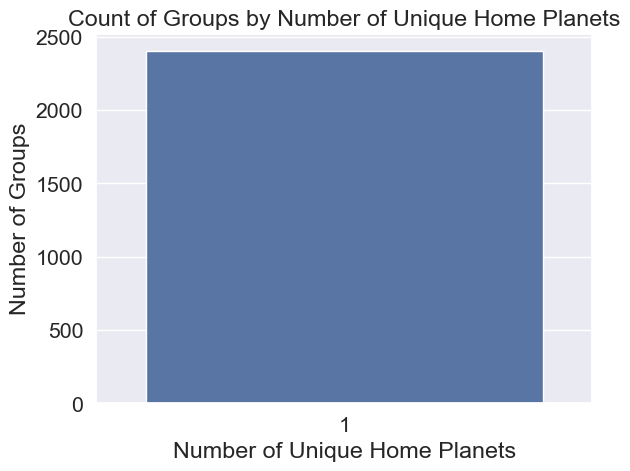

In [36]:
# Joint distribution of Surname and HomePlanet
SHP_gb=data.groupby(['Surname','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# number of unique home planets per surname
unique_surname_count = (SHP_gb > 0).sum(axis=1).value_counts().sort_index()

# plot
sns.barplot(x=unique_surname_count.index, y=unique_surname_count.values)
plt.title('Count of Groups by Number of Unique Home Planets')
plt.xlabel('Number of Unique Home Planets')
plt.ylabel('Number of Groups')
plt.show()

In [37]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Fill nan with group's home planet

# Map the home planet of each group
surname_planet_mapping = data.groupby('Surname')['HomePlanet'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Fill passenger's home planet that are nan with the mapping 
data['HomePlanet'] = data['HomePlanet'].fillna(data['Surname'].map(surname_planet_mapping))

# Print number of missing values
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 94
#HomePlanet missing values after: 10


### Home Planet & Destination 

In [38]:
# Only 10 HomePlanet missing values left - let's look at them
data[data['HomePlanet'].isna()][['PassengerId','HomePlanet','Destination']]

,PassengerId,HomePlanet,Destination
2274,2443_01,NaN,TRAPPIST-1e
2631,2817_01,None,TRAPPIST-1e
3091,3331_01,NaN,TRAPPIST-1e
4548,4840_01,NaN,TRAPPIST-1e
5762,6108_01,NaN,TRAPPIST-1e
8969,0616_01,None,TRAPPIST-1e
10583,4052_01,None,TRAPPIST-1e
11913,7065_01,None,TRAPPIST-1e
12551,8435_01,NaN,TRAPPIST-1e
12725,8775_01,None,TRAPPIST-1e


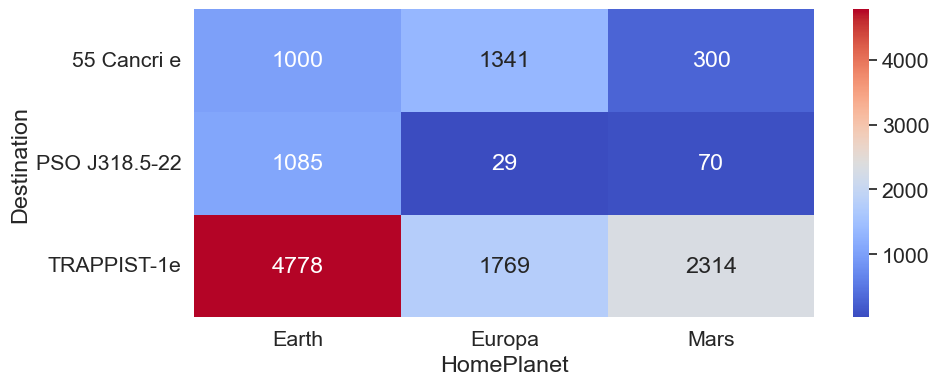

In [39]:
# Joint distribution of HomePlanet and Destination
HPD_gb=data.groupby(['HomePlanet','Destination'])['Destination'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(HPD_gb.T, annot=True, fmt='g', cmap='coolwarm')
plt.show()

In [40]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Fill remaining HomePlanet missing values with Earth (if not on deck D) or Mars (if on Deck D)
data.loc[(data['HomePlanet'].isna()) & ~(data['CabinDeck']=='D'), 'HomePlanet']='Earth'
data.loc[(data['HomePlanet'].isna()) & (data['CabinDeck']=='D'), 'HomePlanet']='Mars'

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 10
#HomePlanet missing values after: 0


## Destination

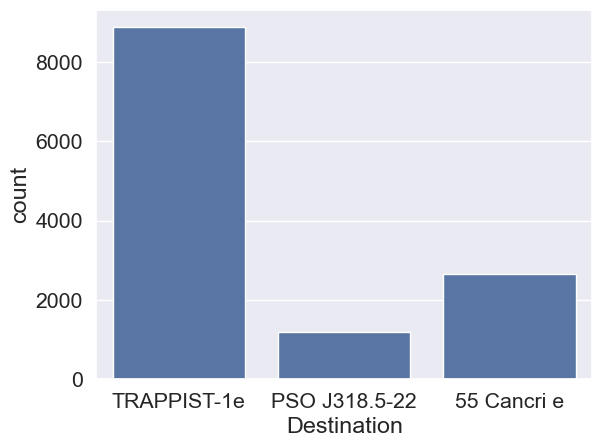

In [41]:
# Plot destination distribution 
sns.countplot(data=data, x='Destination')
plt.show()

Most passengers' destination is Trappist-1e, so we will fill nan values with the mode 

In [42]:
# Missing values before
D_bef=data['Destination'].isna().sum()

# Fill missing Destination values with mode
data.loc[(data['Destination'].isna()), 'Destination']='TRAPPIST-1e'

# Print number of missing values left
print('#Destination missing values before:',D_bef)
print('#Destination missing values after:',data['Destination'].isna().sum())

#Destination missing values before: 274
#Destination missing values after: 0


## Surname and Group 

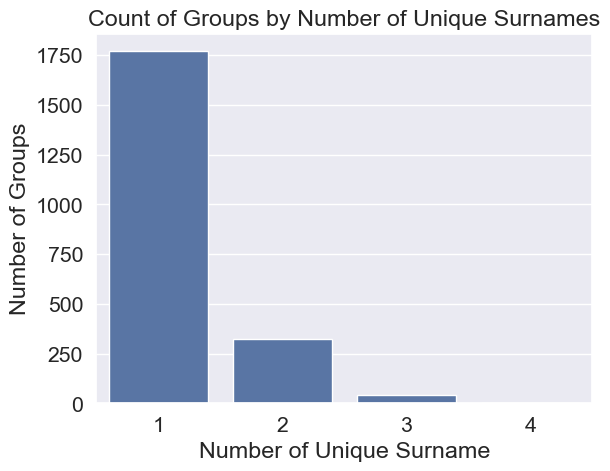

In [43]:
# Joint distribution of Group and Surname
GSN_gb=data[data['Group_size']>1].groupby(['Group','Surname'])['Surname'].size().unstack().fillna(0)

# number of unique home planets per surname
unique_surname_count = (GSN_gb > 0).sum(axis=1).value_counts().sort_index()

# plot
sns.barplot(data=unique_surname_count)
plt.title('Count of Groups by Number of Unique Surnames')
plt.xlabel('Number of Unique Surname')
plt.ylabel('Number of Groups')
plt.show()

In [44]:
# Missing values before
SN_bef=data['Surname'].isna().sum()

# Passengers with missing Surname and in a group with known majority Surname
GSN_index=data[data['Surname'].isna()][(data[data['Surname'].isna()]['Group']).isin(GSN_gb.index)].index

# Fill corresponding missing values
data.loc[GSN_index,'Surname']=data.iloc[GSN_index,:]['Group'].map(lambda x: GSN_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#Surname missing values before:',SN_bef)
print('#Surname missing values after:',data['Surname'].isna().sum())

#Surname missing values before: 294
#Surname missing values after: 155


Update family size feature after filling up some missing values in surname:

In [45]:
# Replace NaN's with outliers (so we can use map)
data['Surname'].fillna('Unknown', inplace=True)

# Update family size feature
data['Family_size']=data['Surname'].map(lambda x: data['Surname'].value_counts()[x])

# Put NaN's back in place of outliers
data.loc[data['Surname']=='Unknown','Surname']=np.nan

# Say unknown surname means no family
data.loc[data['Family_size']>100,'Family_size']=0

## CabinSide and Group

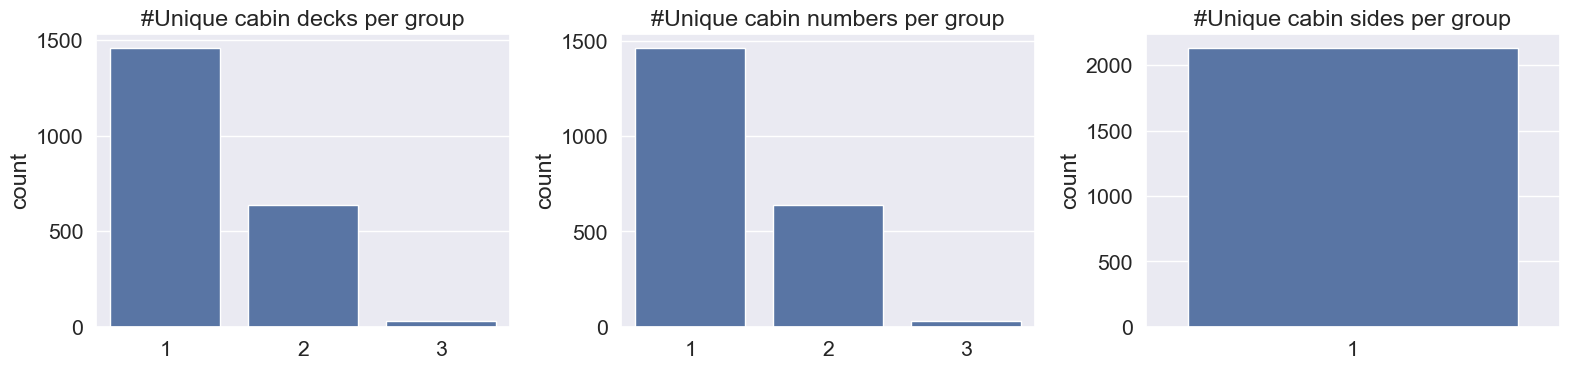

In [46]:
# Joint distribution of Group and Cabin features
GCD_gb=data[data['Group_size']>1].groupby(['Group','CabinDeck'])['CabinDeck'].size().unstack().fillna(0)
GCN_gb=data[data['Group_size']>1].groupby(['Group','CabinNum'])['CabinNum'].size().unstack().fillna(0)
GCS_gb=data[data['Group_size']>1].groupby(['Group','CabinSide'])['CabinSide'].size().unstack().fillna(0)

# number of unique cabindeck/cabinnumber/cabinside
unique_cabindeck_count = (GCD_gb > 0).sum(axis=1).value_counts().sort_index()
unique_cabinnumber_count = (GCN_gb > 0).sum(axis=1).value_counts().sort_index()
unique_cabinside_count = (GCS_gb > 0).sum(axis=1).value_counts().sort_index()

# Plots
fig=plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.barplot(data=unique_cabindeck_count)
plt.title('#Unique cabin decks per group')

plt.subplot(1,3,2)
sns.barplot(data=unique_cabinnumber_count)
plt.title('#Unique cabin numbers per group')

plt.subplot(1,3,3)
sns.barplot(data=unique_cabinside_count)
plt.title('#Unique cabin sides per group')

fig.tight_layout()
plt.show()

 Everyone in the same group is also on the same cabin side. For cabin deck and cabin number there is also a fairly good (but not perfect) correlation with group.

In [47]:
# Missing values before
CS_bef=data['CabinSide'].isna().sum()

# Passengers with missing Cabin side and in a group with known Cabin side
GCS_index=data[data['CabinSide'].isna()][(data[data['CabinSide'].isna()]['Group']).isin(GCS_gb.index)].index

# Fill corresponding missing values
data.loc[GCS_index,'CabinSide']=data.iloc[GCS_index,:]['Group'].map(lambda x: GCS_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#CabinSide missing values before:',CS_bef)
print('#CabinSide missing values after:',data['CabinSide'].isna().sum())

#CabinSide missing values before: 299
#CabinSide missing values after: 162


## Cabin Side and Surname

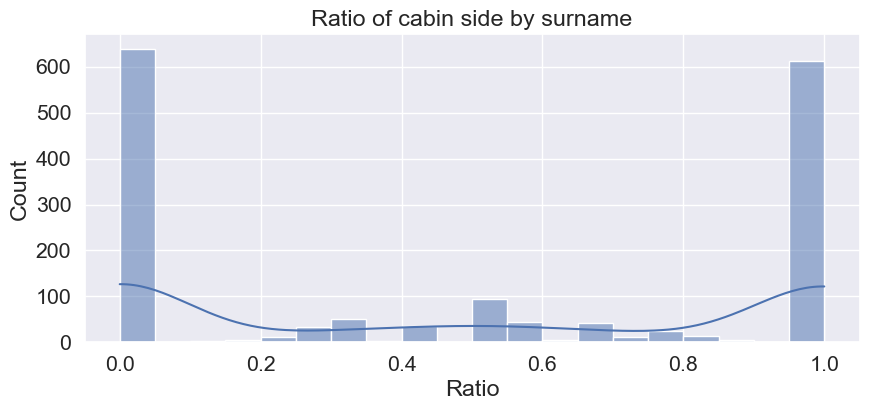

In [48]:
# Joint distribution of Surname and Cabin side
SCS_gb=data[data['Group_size']>1].groupby(['Surname','CabinSide'])['CabinSide'].size().unstack().fillna(0)

# Ratio of sides
SCS_gb['Ratio']=SCS_gb['P']/(SCS_gb['P']+SCS_gb['S'])

# Histogram of ratio
plt.figure(figsize=(10,4))
sns.histplot(SCS_gb['Ratio'], kde=True, binwidth=0.05)
plt.title('Ratio of cabin side by surname')
plt.show()

This shows that families tend to be on the same cabin side

In [49]:
# Missing values before
CS_bef=data['CabinSide'].isna().sum()

# Drop ratio column
SCS_gb.drop('Ratio', axis=1, inplace=True)

# Passengers with missing Cabin side and in a family with known Cabin side
SCS_index=data[data['CabinSide'].isna()][(data[data['CabinSide'].isna()]['Surname']).isin(SCS_gb.index)].index

# Fill corresponding missing values
data.loc[SCS_index,'CabinSide']=data.iloc[SCS_index,:]['Surname'].map(lambda x: SCS_gb.idxmax(axis=1)[x])

# Drop surname (we don't need it anymore)
data.drop('Surname', axis=1, inplace=True)

# Print number of missing values left
print('#CabinSide missing values before:',CS_bef)
print('#CabinSide missing values after:',data['CabinSide'].isna().sum())

#CabinSide missing values before: 162
#CabinSide missing values after: 66


The remaining missing values will be replaced with an outlier. This is because we really don't know which one of the two (balanced) sides we should assign.

In [50]:
# Missing values before
CS_bef=data['CabinSide'].isna().sum()

# Fill remaining missing values with outlier
data.loc[data['CabinSide'].isna(),'CabinSide']='Z'

# Print number of missing values left
print('#CabinSide missing values before:',CS_bef)
print('#CabinSide missing values after:',data['CabinSide'].isna().sum())

#CabinSide missing values before: 66
#CabinSide missing values after: 0


## Cabin Deck and Group

Groups tend to be on the same cabin deck

In [51]:
# Missing values before
CD_bef=data['CabinDeck'].isna().sum()

# Passengers with missing Cabin deck and in a group with known majority Cabin deck
GCD_index=data[data['CabinDeck'].isna()][(data[data['CabinDeck'].isna()]['Group']).isin(GCD_gb.index)].index

# Fill corresponding missing values
data.loc[GCD_index,'CabinDeck']=data.iloc[GCD_index,:]['Group'].map(lambda x: GCD_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#CabinDeck missing values before:',CD_bef)
print('#CabinDeck missing values after:',data['CabinDeck'].isna().sum())

#CabinDeck missing values before: 299
#CabinDeck missing values after: 162


## Cabin Deck and home planet

- Passengers from Mars are most likely in deck F.
- Passengers from Europa are (more or less) most likely in deck C if travelling solo and deck B otherwise.
- Passengers from Earth are (more or less) most likely in deck G.

In [52]:
# Missing values before
CD_bef=data['CabinDeck'].isna().sum()

# Fill missing values using the mode
na_rows_CD=data.loc[data['CabinDeck'].isna(),'CabinDeck'].index
data.loc[data['CabinDeck'].isna(),'CabinDeck']=data.groupby(['HomePlanet','Destination','Solo'])['CabinDeck'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CD]

# Print number of missing values left
print('#CabinDeck missing values before:',CD_bef)
print('#CabinDeck missing values after:',data['CabinDeck'].isna().sum())

#CabinDeck missing values before: 162
#CabinDeck missing values after: 0


## Cabin Number and cabin deck 

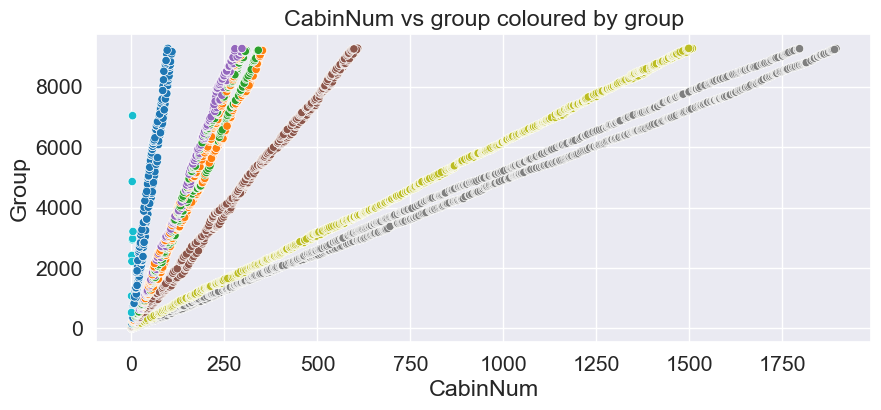

In [53]:
# Scatterplot
plt.figure(figsize=(10,4))
sns.scatterplot(x=data['CabinNum'], y=data['Group'], c=LabelEncoder().fit_transform(data.loc[~data['CabinNum'].isna(),'CabinDeck']), cmap='tab10')
plt.title('CabinNum vs group coloured by group')
plt.show()

There is an interesting pattern here. The cabin_number and group_number share a linear relationship on a deck by deck basis. We can therefore extrapolate the missing cabin numbers using linear regression on a deck by deck basis to get an approximate cabin number.

In [54]:
# Missing values before
CN_bef=data['CabinNum'].isna().sum()

# Extrapolate linear relationship on a deck by deck basis
for deck in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    # Features and labels
    X_CN=data.loc[~(data['CabinNum'].isna()) & (data['CabinDeck']==deck),'Group']
    y_CN=data.loc[~(data['CabinNum'].isna()) & (data['CabinDeck']==deck),'CabinNum']
    X_test_CN=data.loc[(data['CabinNum'].isna()) & (data['CabinDeck']==deck),'Group']

    # Linear regression
    model_CN=LinearRegression()
    model_CN.fit(X_CN.values.reshape(-1, 1), y_CN)
    preds_CN=model_CN.predict(X_test_CN.values.reshape(-1, 1))
    
    # Fill missing values with predictions
    data.loc[(data['CabinNum'].isna()) & (data['CabinDeck']==deck),'CabinNum']=preds_CN.astype(int)

# Print number of missing values left
print('#CabinNum missing values before:',CN_bef)
print('#CabinNum missing values after:',data['CabinNum'].isna().sum())

#CabinNum missing values before: 299
#CabinNum missing values after: 0


In [55]:
# One-hot encode cabin regions
data['Cabin_region1']=(data['CabinNum']<300).astype(int)
data['Cabin_region2']=((data['CabinNum']>=300) & (data['CabinNum']<600)).astype(int)
data['Cabin_region3']=((data['CabinNum']>=600) & (data['CabinNum']<900)).astype(int)
data['Cabin_region4']=((data['CabinNum']>=900) & (data['CabinNum']<1200)).astype(int)
data['Cabin_region5']=((data['CabinNum']>=1200) & (data['CabinNum']<1500)).astype(int)
data['Cabin_region6']=((data['CabinNum']>=1500) & (data['CabinNum']<1800)).astype(int)
data['Cabin_region7']=(data['CabinNum']>=1800).astype(int)

## VIP 

This feature is imbalanced so we'll use the mode

In [56]:
data['VIP'].value_counts()

VIP
False    12401
True       273
Name: count, dtype: int64

In [57]:
# Missing values before
V_bef=data['VIP'].isna().sum()

# Fill missing values with mode
data.loc[data['VIP'].isna(),'VIP']=False

# Print number of missing values left
print('#VIP missing values before:',V_bef)
print('#VIP missing values after:',data['VIP'].isna().sum())

#VIP missing values before: 296
#VIP missing values after: 0


## Age 

In [58]:
# Joint distribution
data.groupby(['HomePlanet','NoExp','Solo','CabinDeck'])['Age'].median().unstack().fillna(0)

CabinDeck                 A     B     C     D     E     F     G     T
HomePlanet NoExp Solo                                                
Earth      0     0      0.0   0.0   0.0   0.0  24.0  25.0  28.0   0.0
                 1      0.0   0.0   0.0   0.0  25.0  24.0  26.0   0.0
           1     0      0.0   0.0   0.0   0.0   7.0  16.0   8.0   0.0
                 1      0.0   0.0   0.0   0.0  21.0  21.5  23.0   0.0
Europa     0     0     35.0  34.0  33.0  33.0  34.0   0.0   0.0  44.0
                 1     35.0  36.0  35.5  34.0  35.0   0.0   0.0  35.0
           1     0     30.0  27.0  28.5  27.0  28.0   0.0   0.0   0.0
                 1     37.5  34.0  35.0  31.0  33.0   0.0   0.0   0.0
Mars       0     0      0.0   0.0   0.0  30.0  29.0  29.0   0.0   0.0
                 1      0.0   0.0   0.0  31.0  28.5  30.0   0.0   0.0
           1     0      0.0   0.0   0.0  29.5  26.0  18.0   0.0   0.0
                 1      0.0   0.0   0.0  33.0  30.0  29.5   0.0   0.0

In [59]:
# Missing values before
A_bef=data['Age'].isna().sum().sum()

# Fill missing values using the median
na_rows_A=data.loc[data['Age'].isna(),'Age'].index
data.loc[data['Age'].isna(),'Age']=data.groupby(['HomePlanet','NoExp','Solo','CabinDeck'])['Age'].transform(lambda x: x.fillna(x.median()))[na_rows_A]

# Print number of missing values left
print('#Age missing values before:',A_bef)
print('#Age missing values after:',data['Age'].isna().sum())

#Age missing values before: 270
#Age missing values after: 0


In [60]:
# Update age group feature
data.loc[data['Age']<=12,'AgeGroup']='Age_0-12'
data.loc[(data['Age']>12) & (data['Age']<=18),'AgeGroup']='Age_13-18'
data.loc[(data['Age']>18) & (data['Age']<=25),'AgeGroup']='Age_19-25'
data.loc[(data['Age']>25) & (data['Age']<=30),'AgeGroup']='Age_26-30'
data.loc[(data['Age']>30) & (data['Age']<=50),'AgeGroup']='Age_31-50'
data.loc[data['Age']>50,'AgeGroup']='Age_51+'

## Cryosleep

The best way to predict if a passenger is in CryoSleep or not is to see if they spent anything.

In [61]:
# Joint distribution
data.groupby(['NoExp','CryoSleep'])['CryoSleep'].size().unstack().fillna(0)

CryoSleep,False,True
NoExp,,
0,7339.0,0.0
1,740.0,4581.0


In [62]:
# Missing values before
CSL_bef=data['CryoSleep'].isna().sum()

# Fill missing values using the mode
na_rows_CSL=data.loc[data['CryoSleep'].isna(),'CryoSleep'].index
data.loc[data['CryoSleep'].isna(),'CryoSleep']=data.groupby(['NoExp'])['CryoSleep'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CSL]

# Print number of missing values left
print('#CryoSleep missing values before:',CSL_bef)
print('#CryoSleep missing values after:',data['CryoSleep'].isna().sum())

#CryoSleep missing values before: 310
#CryoSleep missing values after: 0


## Exp and Cryosleep

This one makes a lot of sense. We don't expect people in CryoSleep to be able to spend anything.

In [63]:
# Missing values before
E_bef=data[features].isna().sum().sum()

# CryoSleep has no expenditure
for col in features:
    data.loc[(data[col].isna()) & (data['CryoSleep']==True), col]=0

# Print number of missing values left
print('#Expenditure missing values before:',E_bef)
print('#Expenditure missing values after:',data[features].isna().sum().sum())

#Expenditure missing values before: 1410
#Expenditure missing values after: 866


## Exp and Others

Expenditure varies across many features but we will only impute missing values using HomePlanet, Solo and Age group to prevent overfitting. We will also use the mean instead of the median because a large proportion of passengers don't spend anything and median usually comes out as 0. Note how under 12's don't spend anything.

In [64]:
# Joint distribution
data.groupby(['HomePlanet','Solo','AgeGroup'])['TotalExp'].mean().unstack().fillna(0)

AgeGroup         Age_0-12    Age_13-18    Age_19-25    Age_26-30    Age_31-50  \
HomePlanet Solo                                                                 
Earth      0          0.0   725.122449   799.036017   841.093596   736.655773   
           1          0.0   703.192020   788.284852   795.420690   794.818627   
Europa     0          0.0  1350.567164  2735.909366  3534.668246  3975.774005   
           1          0.0  1887.958333  2354.517544  3806.000000  3949.939929   
Mars       0          0.0  1123.175141  1190.694915  1247.098361  1143.671916   
           1          0.0  1489.655172  1050.459459  1107.122677  1110.392045   

AgeGroup             Age_51+  
HomePlanet Solo               
Earth      0      733.649573  
           1      826.366972  
Europa     0     3483.639004  
           1     3952.085526  
Mars       0     1345.419643  
           1     1100.298387

In [65]:
# Missing values before
E_bef=data[features].isna().sum().sum()

# Fill remaining missing values using the median
for col in features:
    na_rows=data.loc[data[col].isna(),col].index
    data.loc[data[col].isna(),col]=data.groupby(['HomePlanet','Solo','AgeGroup'])[col].transform(lambda x: x.fillna(x.mean()))[na_rows]
    
# Print number of missing values left
print('#Expenditure missing values before:',E_bef)
print('#Expenditure missing values after:',data[features].isna().sum().sum())

#Expenditure missing values before: 866
#Expenditure missing values after: 0


In [66]:
# Update expenditure and no_spending
data['TotalExp']=data[features].sum(axis=1)
data['No_spending']=(data['TotalExp']==0).astype(int)

In [67]:
data.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin            299
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
AgeGroup           0
TotalExp           0
NoExp              0
EssentialExp       0
LuxuryExp          0
Group              0
GroupSize          0
Group_size         0
Solo               0
CabinDeck          0
CabinNum           0
CabinSide          0
Cabin_region1      0
Cabin_region2      0
Cabin_region3      0
Cabin_region4      0
Cabin_region5      0
Cabin_region6      0
Cabin_region7      0
Family_size        0
No_spending        0
dtype: int64

# Preprocessing

## Split data back into train and test sets

In [68]:
# Train and test
X=data[data['PassengerId'].isin(train['PassengerId'].values)].copy()
X_test=data[data['PassengerId'].isin(test['PassengerId'].values)].copy()

In [69]:
# Drop qualitative/redundant/collinear/high cardinality features
X.drop(['PassengerId', 'Group', 'Group_size', 'GroupSize', 'CabinNum', 'Cabin', 'No_spending'], axis=1, inplace=True)
X_test.drop(['PassengerId', 'Group', 'Group_size', 'GroupSize', 'CabinNum','Cabin', 'No_spending'], axis=1, inplace=True)

## Log transform

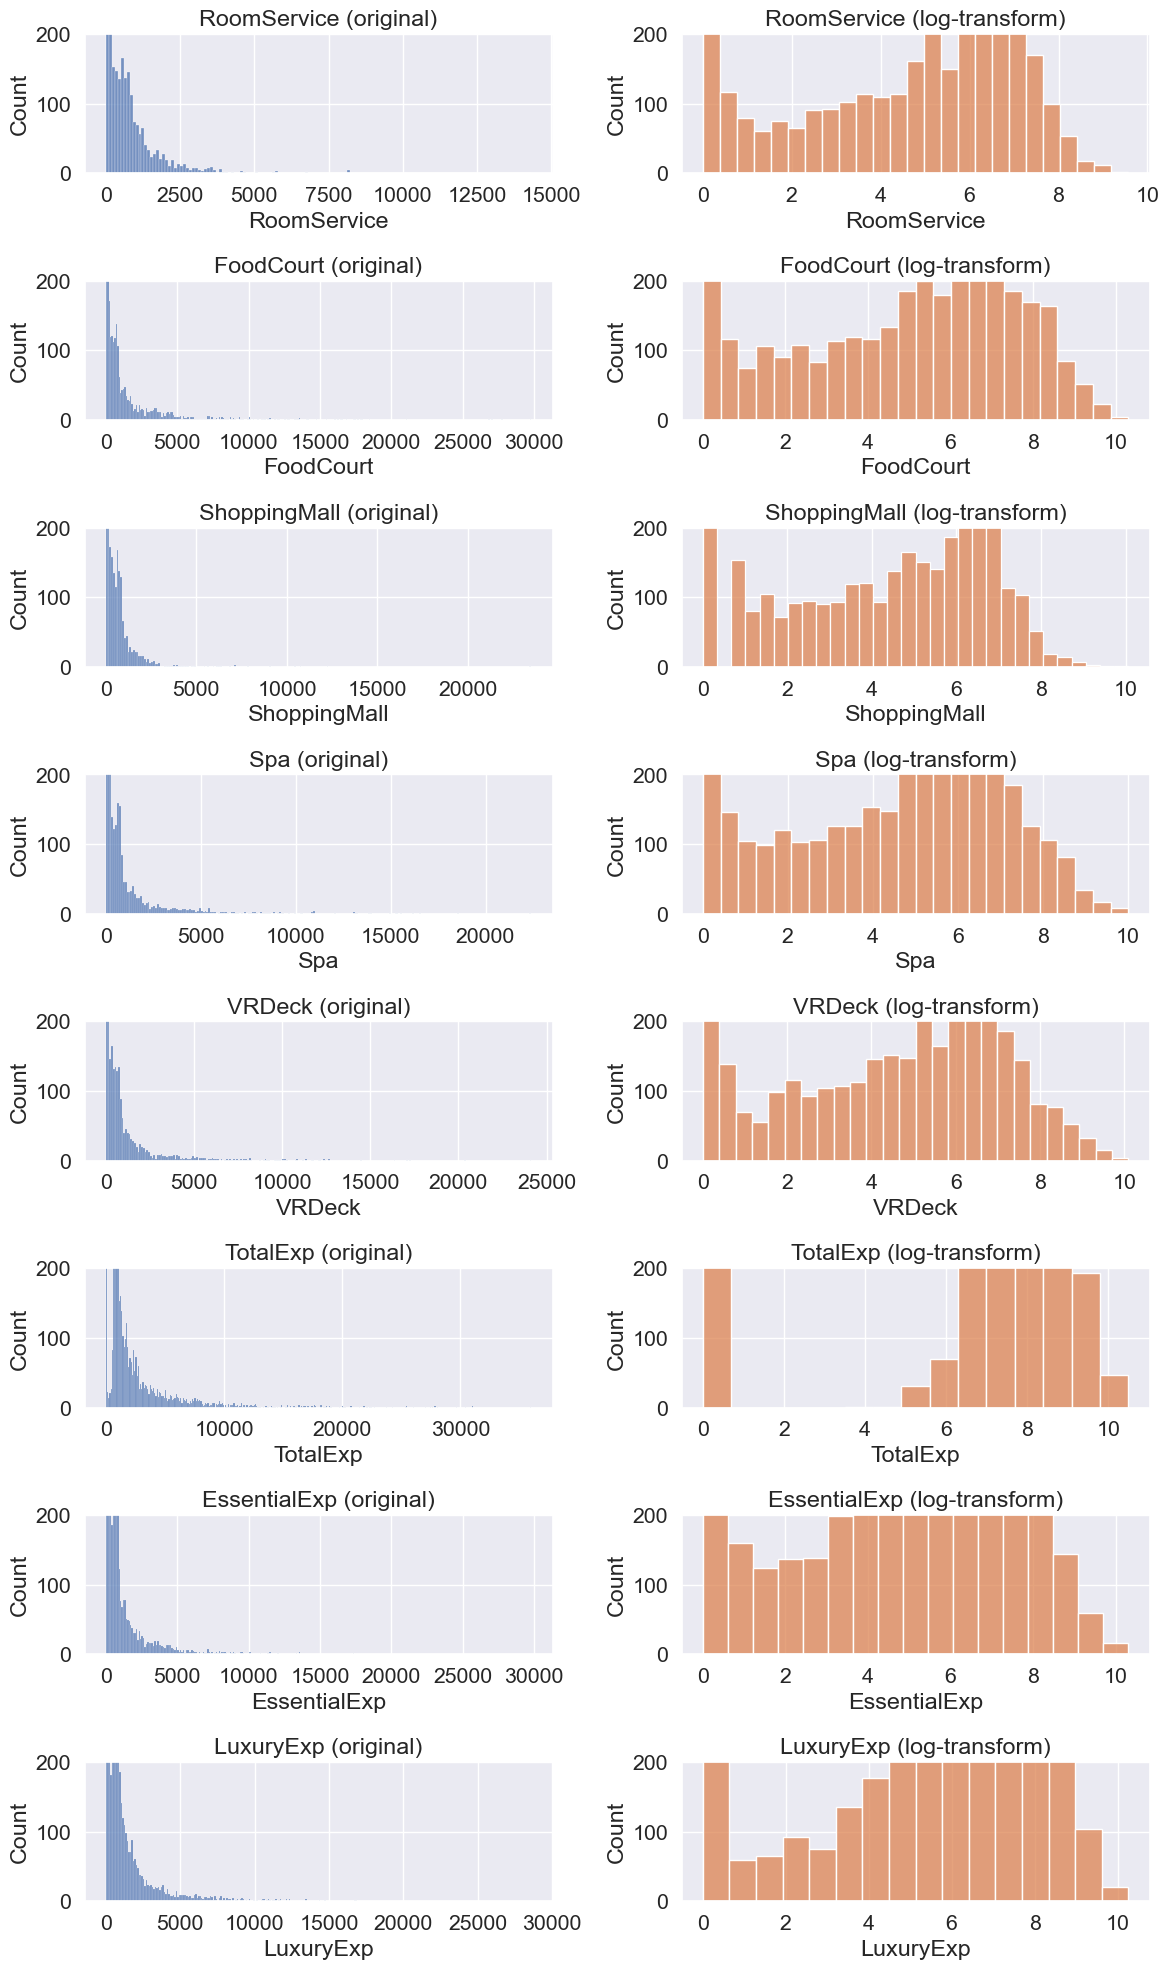

In [70]:
# Plot log transform results
fig=plt.figure(figsize=(12,20))
for i, col in enumerate(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalExp', 'EssentialExp', 'LuxuryExp']):
    plt.subplot(8,2,2*i+1)
    sns.histplot(X[col], binwidth=100)
    plt.ylim([0,200])
    plt.title(f'{col} (original)')
    
    plt.subplot(8,2,2*i+2)
    sns.histplot(np.log(1+X[col]), color='C1')
    plt.ylim([0,200])
    plt.title(f'{col} (log-transform)')
    
fig.tight_layout()
plt.show()

In [71]:
# Apply log transform
for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalExp', 'EssentialExp', 'LuxuryExp']:
    X[col]=np.log(1+X[col])
    X_test[col]=np.log(1+X_test[col])

## Encoding and Scaling

In [ ]:
# Indentify numerical and categorical columns
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]

# Scale numerical data to have mean=0 and variance=1
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# One-hot encode categorical data
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))])

# Combine preprocessing
ct = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)],
        remainder='passthrough')

# Apply preprocessing
X = ct.fit_transform(X)
X_test = ct.transform(X_test)

# Print new shape
print('Training set shape:', X.shape)

Training set shape: (8693, 44)


### PCA

Explained variance ratio: [0.25642181 0.09437533 0.05840641]
Shape of X_pca: (8693, 3)


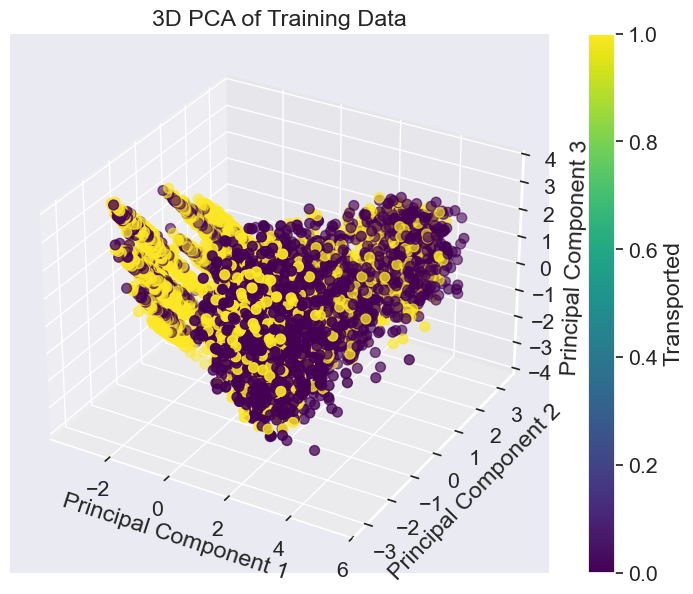

In [ ]:
# Initialize PCA with the number of components to keep
pca = PCA(n_components=3)  

# Fit and transform the data
X_pca = pca.fit_transform(X)

# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Print the shape of the transformed data
print("Shape of X_pca:", X_pca.shape)

# 3D Visualization of PCA results
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', s=50)
# Labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Training Data')
# Color bar
cbar = plt.colorbar(sc)
cbar.set_label('Transported')
plt.show()

### Create Validation Set

In [78]:
# Train-validation split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.8, test_size=0.2, random_state=0)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_train shape:", y_train.shape)
print("y_valid shape:", y_valid.shape)

X_train shape: (6954, 44)
X_valid shape: (1739, 44)
y_train shape: (6954,)
y_valid shape: (1739,)


# Model Selection